## wordcloud คำทั้งหมด

In [1]:
from wordcloud import WordCloud
from collections import Counter
import pandas as pd

In [2]:
df=pd.read_csv("Jomtien_Beach_Night_Market_Processed.csv")
df['processed_text'] = df['processed_text'].map(lambda x: list(eval(x)))
df=df.drop(['Unnamed: 0'],axis=1)

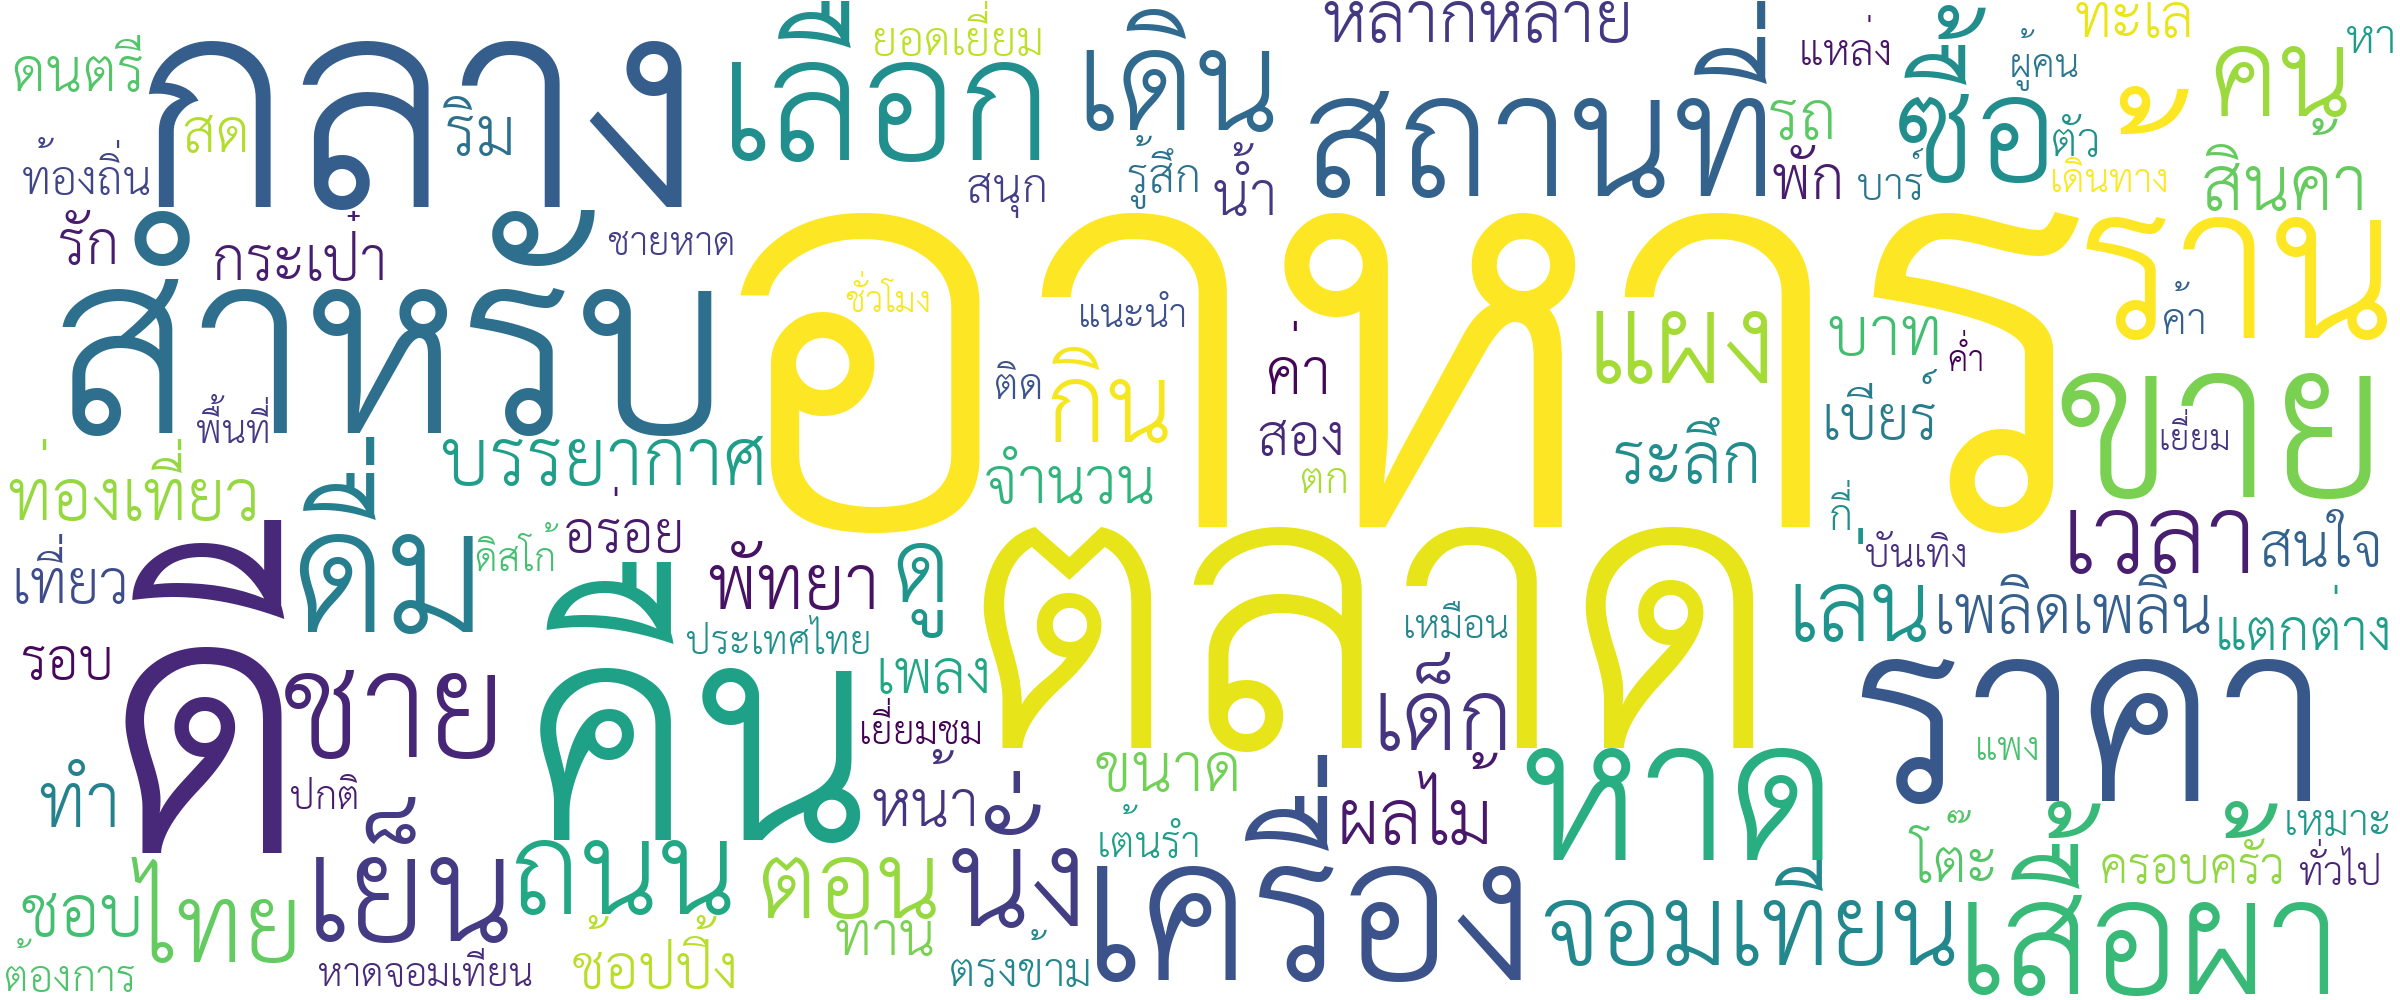

In [3]:
# Flatten the list of words into a single list
words = [word for sublist in df['processed_text'] for word in sublist]

# Count the frequency of each word in the list of words
word_freq = Counter(words)
# Select the top 100 most frequent words
top_N_words = [word for word, _ in word_freq.most_common(100)]

wordcloud = WordCloud(font_path='D:\oho\THSarabunNew.ttf',background_color="white",prefer_horizontal=True, max_words=100, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud.generate_from_frequencies({word: word_freq[word] for word in top_N_words})
wordcloud.to_image()

## wordcloud ที่ลบคำไม่สนใจ

### ลบคำที่ไม่สนใจ

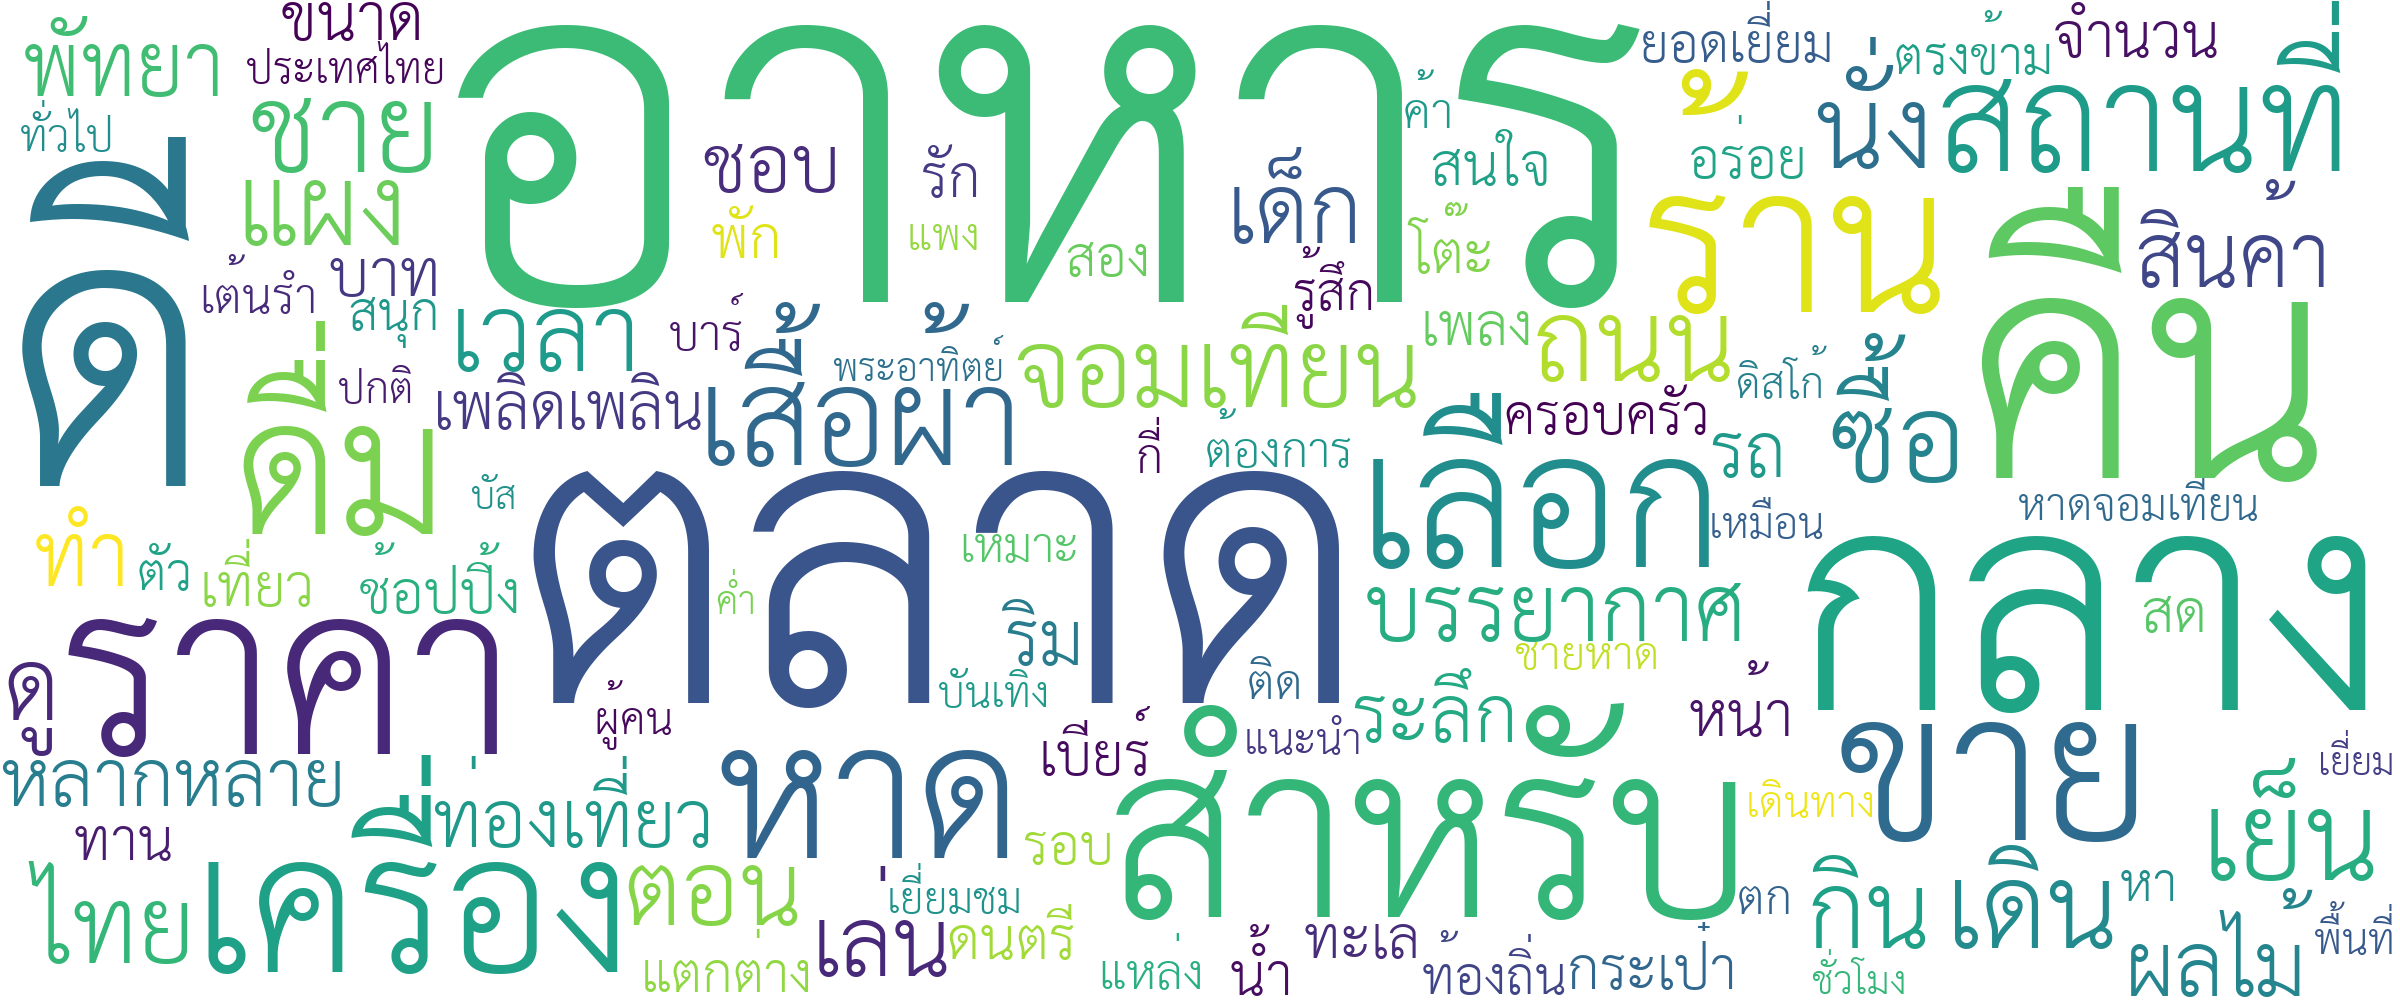

In [4]:
#คน,ค่า
keys_to_remove =  input("ใส่คำที่ต้องการกรองออกคั่นด้วย , หรือ space bar: ").replace(',', ' ').split()
words= [item for item in words if item not in keys_to_remove]
word_freq = Counter(words)
# Select the top 100 most frequent words
top_N_words_filter = [word for word, _ in word_freq.most_common(100)]

wordcloud2 = WordCloud(font_path='D:\oho\THSarabunNew.ttf',background_color="white",prefer_horizontal=True, max_words=100, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud2.generate_from_frequencies({word: word_freq[word] for word in top_N_words_filter})
wordcloud2.to_image()

## wordcloud แสดงคำที่สนใจว่าเกิดมากน้อยแค่ไหน

### เลือกคำที่สนใจ

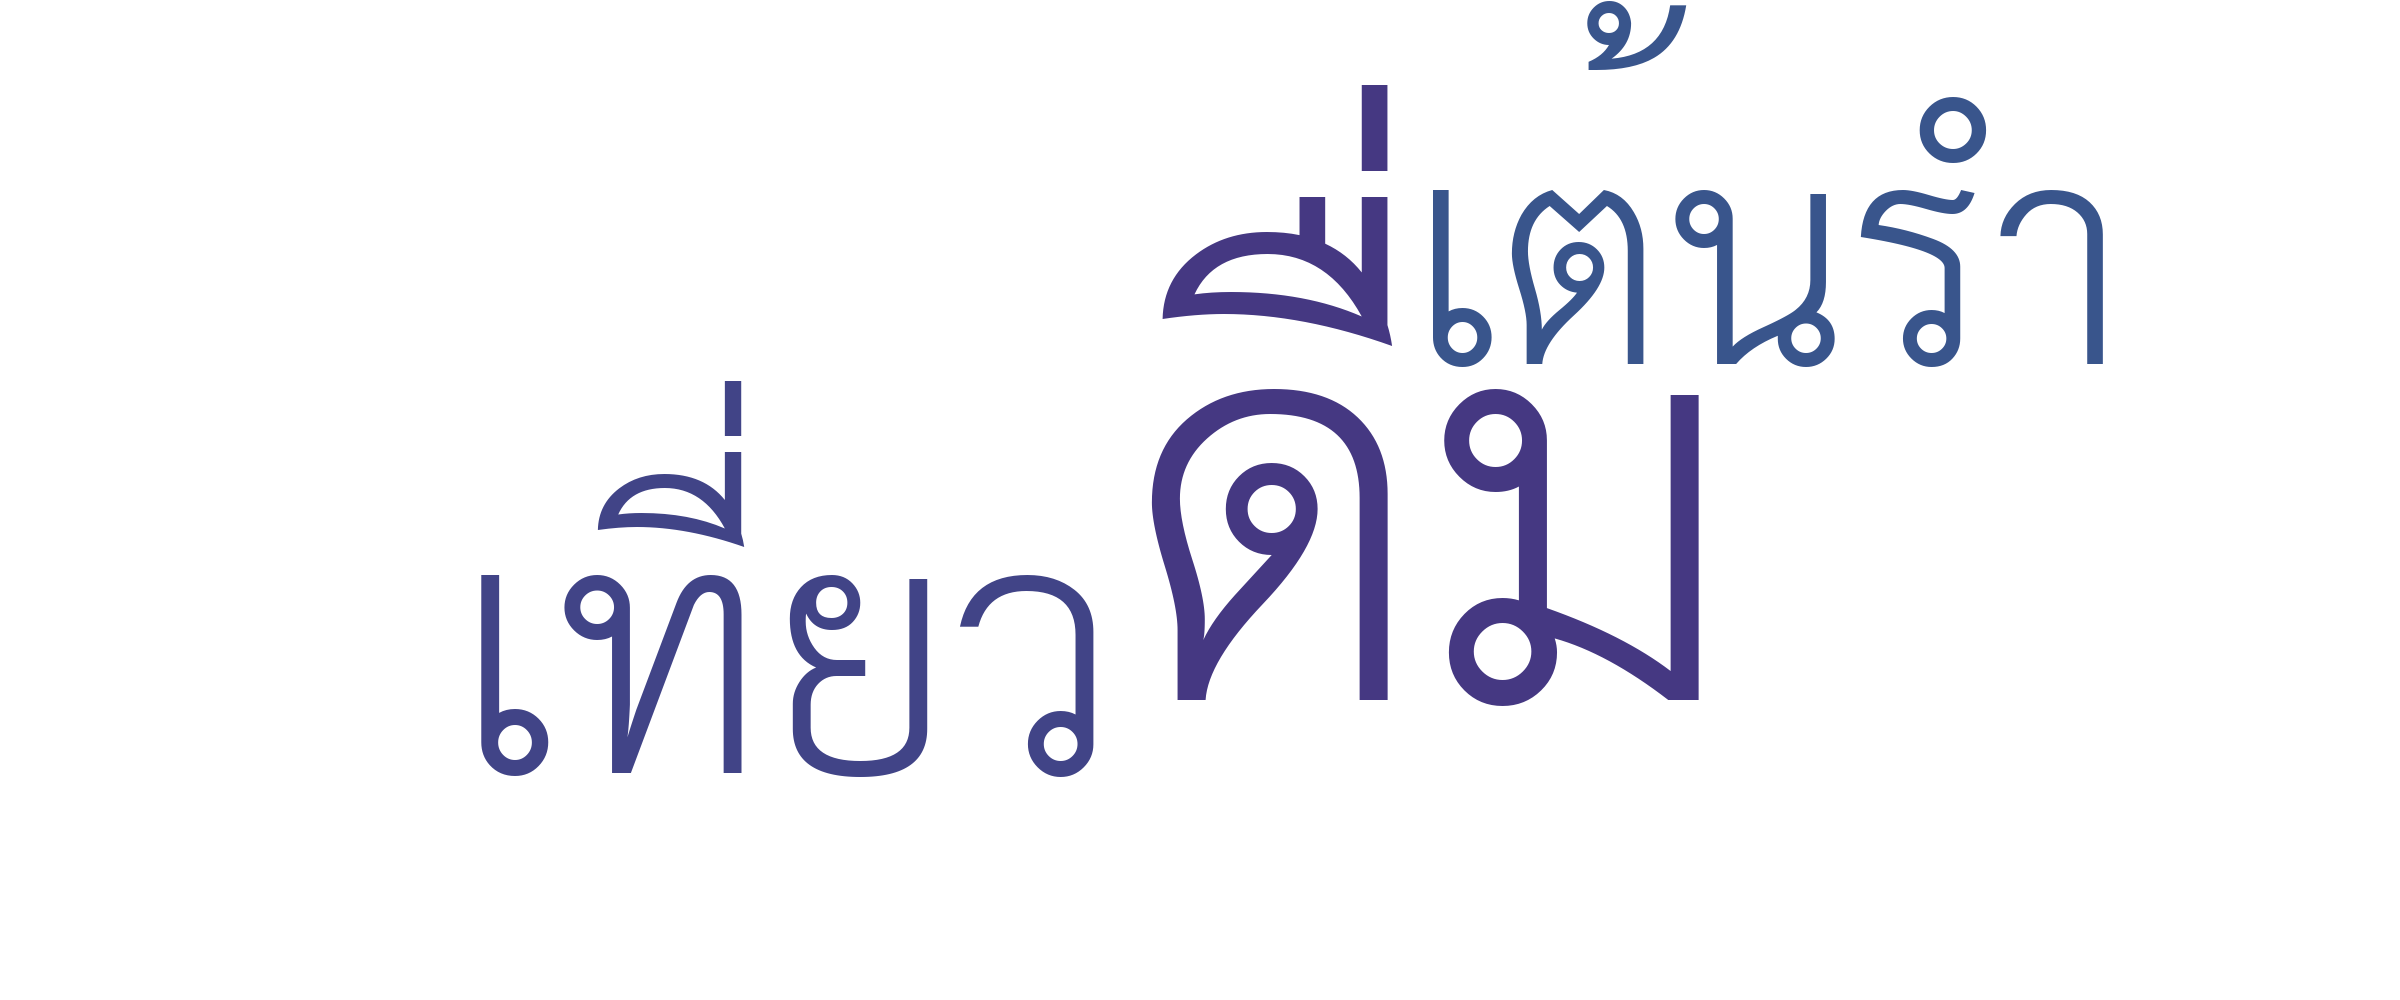

In [5]:
#ดื่ม,เต้นรำ,เที่ยว
keywords =  input("ใส่คำที่สนใจออกคั่นด้วย , หรือ space bar: ").replace(',', ' ').split()
df_paid_interest = df[df['review'].apply(lambda x: any(keyword in x for keyword in keywords))]
#df_paid.head()
# Remove any stopwords and non-Thai characters from the list of words and select only the words that are in the list of keywords
words_interest = [word for sublist in df['processed_text'] for word in sublist]
words_interest = [word for word in words if word in keywords]

# Count the frequency of each word in the list of words
word_freq_interest = Counter(words_interest)

wordcloud3 = WordCloud(font_path='D:\oho\THSarabunNew.ttf',background_color="white",prefer_horizontal=True, max_words=100, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud3.generate_from_frequencies({word: word_freq[word] for word in word_freq_interest})
wordcloud3.to_image()

# กรองแชท

## focus คำใดคำนึงในกลุ่มคำที่สนใจ

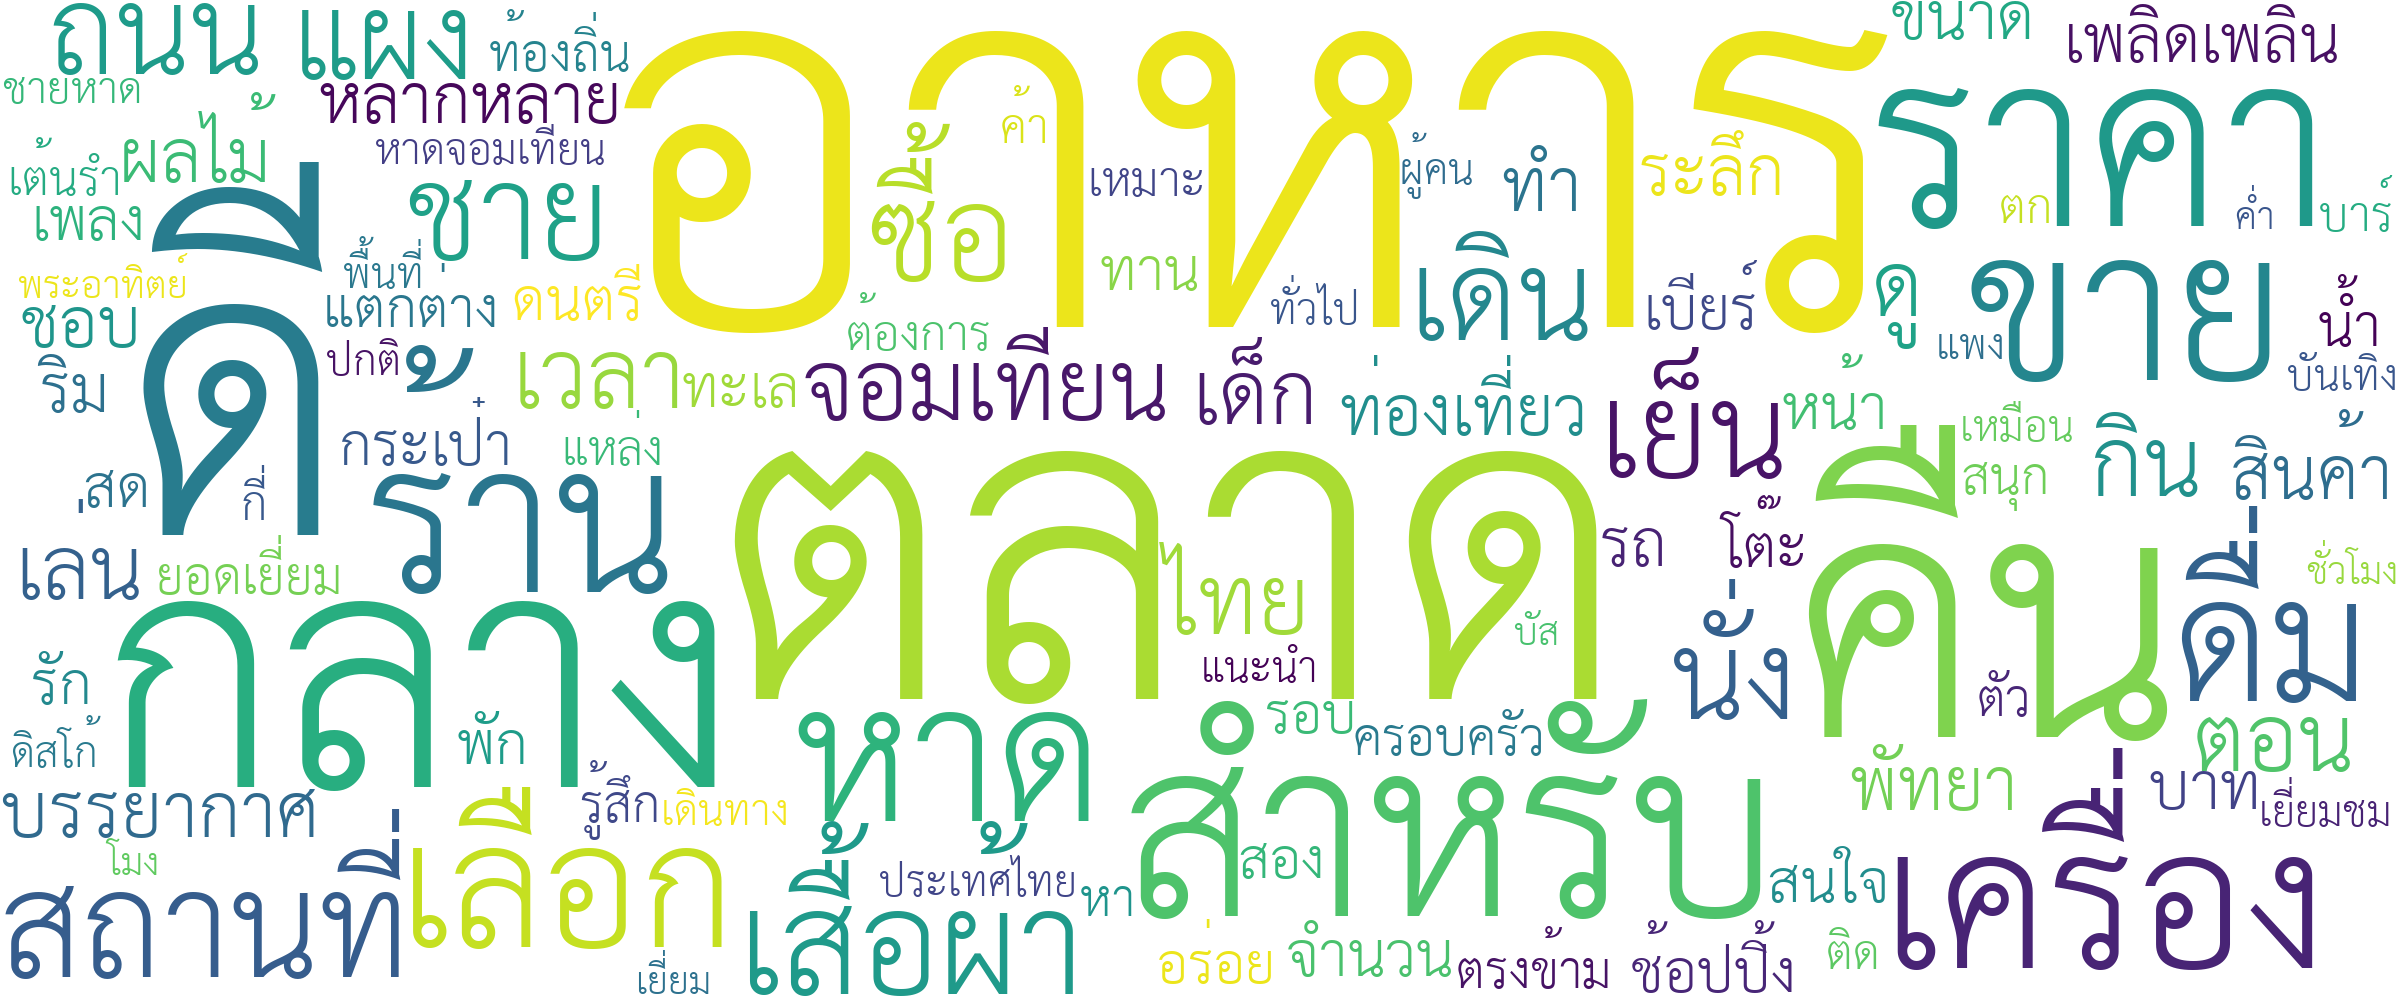

In [6]:
#ex เที่ยว
interest=input("เลือกคำที่สนใจจากกลุ่มคำที่สนใจมา 1 คำ : ")
df_interest = df_paid_interest[df_paid_interest['review'].apply(lambda x: interest in x)]

#all wordcloud 
words_focus = [word for sublist in df_interest['processed_text'] for word in sublist]
words_focus= [item for item in words if item not in keys_to_remove]
words_focus= [item for item in words if item not in interest]
# Count the frequency of each word in the list of words
word_freq_focus = Counter(words_focus)

wordcloud4 = WordCloud(font_path='D:\oho\THSarabunNew.ttf',background_color="white",prefer_horizontal=True, max_words=100, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud4.generate_from_frequencies({word: word_freq[word] for word in word_freq_focus})
wordcloud4.to_image()

## เลือกคำที่สนใจจาก wordcloud

In [7]:
#ex สถานที่
interest2 = input("ใส่คำที่สนใจ 1 คำ : ")
selected_rows = df_interest[df_interest['review'].apply(lambda x: interest2 in x)]
selected_rows = selected_rows.drop(['processed_text'],axis=1)
selected_rows

,review
39,นี่เป็นหนึ่งในตลาดกลางคืนที่ได้รับความนิยมมากใ...
43,สามารถเดินจากอพาร์ทเมนท์ของเรา เดินเที่ยวตลาดแ...
76,สถานที่ท่องเที่ยวที่น่าสนใจ
91,ตลาดแห่งนี้เป็นสถานที่ที่ต้องไปเยือนในขณะที่จอ...
133,หากคุณกำลังมองหาประสบการณ์แบบไทยแท้ แล้วที่นี่...
137,หาดจอมเทียนเป็นตลาดกลางคืนมากที่เกิดขึ้น มีผู้...


## export final output in excel file

In [8]:
file_name = interest+'_'+interest2+'.xlsx'
selected_rows.to_excel(file_name)